<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/Understanding_Confusion_Matrix1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.metrics import roc_curve, auc


Automatically created module for IPython interactive environment


Let's import our data set from github and read into a Pandas Data frame

In [2]:
data_link = 'https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/diabetes.csv'

diabetes_df = pd.read_csv(data_link)

diabetes_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


Let's check the shape and if any missing values exist

In [3]:
diabetes_df.shape

(15000, 10)

In [4]:
diabetes_df.isna().any()

PatientID                 False
Pregnancies               False
PlasmaGlucose             False
DiastolicBloodPressure    False
TricepsThickness          False
SerumInsulin              False
BMI                       False
DiabetesPedigree          False
Age                       False
Diabetic                  False
dtype: bool

Let's look at the distribution of each column, this would help us choose the most ideal feature normalization method.<br>
First let's define a method that plots the distribution of each feature.

In [0]:
def plot_features(data):
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background
    plt.suptitle('Visualizing The Features Distribution', y=0.95)

    plt.subplot(241)
    color_list = ['gold','purple','brown']
    data.Age.plot(kind='hist', color='brown')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    plt.subplot(242)
    color_list = ['gold','purple','brown']
    data.Pregnancies.plot(kind='hist', color='brown')
    plt.xlabel('Pregnancies')
    plt.ylabel('Frequency')

    plt.subplot(243)
    color_list = ['gold','purple','brown']
    data.PlasmaGlucose.plot(kind='hist', color='brown')
    plt.xlabel('PlasmaGlucose')
    plt.ylabel('Frequency')

    plt.subplot(244)
    color_list = ['gold','purple','brown']
    data.DiastolicBloodPressure.plot(kind='hist', color='brown')
    plt.xlabel('DiastolicBP')
    plt.ylabel('Frequency')

    plt.subplot(245)
    color_list = ['gold','purple','brown']
    data.TricepsThickness.plot(kind='hist', color='brown')
    plt.xlabel('TricepsThickness')
    plt.ylabel('Frequency')

    plt.subplot(246)
    color_list = ['gold','purple','brown']
    data.SerumInsulin.plot(kind='hist', color='brown')
    plt.xlabel('SerumInsulin')
    plt.ylabel('Frequency')


    plt.subplot(247)
    color_list = ['gold','purple','brown']
    data.BMI.plot(kind='hist', color='brown')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')

    plt.subplot(248)
    color_list = ['gold','purple','brown']
    data.DiabetesPedigree.plot(kind='hist', color='brown')
    plt.xlabel('DiabetesPedigree')
    plt.ylabel('Frequency')

    plt.show()

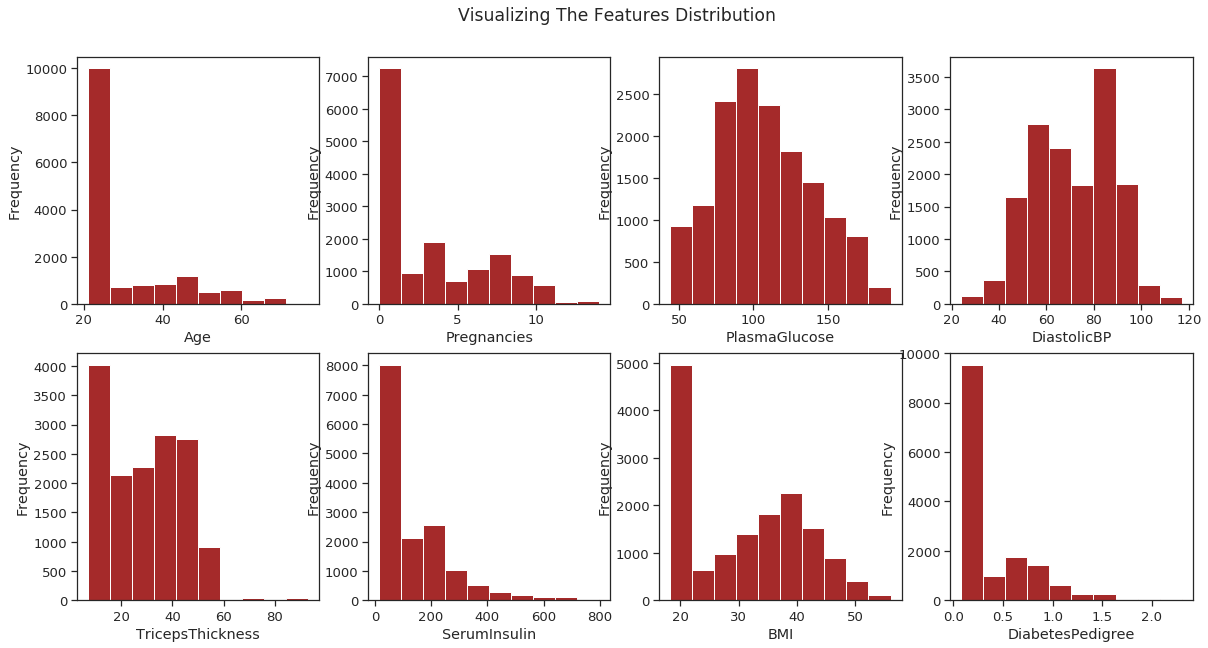

In [6]:
plot_features(diabetes_df)

We can see that features like Age, DiabetesPedigree, SerumInsulin and BMI seem to be skewed to the right.<br>
This is due to a lot of smaller values and a progressive distribution of fewer large values.<br>
Let's make the distribution better by using the log of the values, rather than actual values in these features.<br>
This is a part of the  feature-engineering process in Machine Learning

In [7]:
for i in diabetes_df.columns:
    if i in ['Age', 'DiabetesPedigree', 'BMI', 'SerumInsulin']:
        print(i)
        diabetes_df[i] = diabetes_df[i].apply(np.log)


SerumInsulin
BMI
DiabetesPedigree
Age


Let's view the distribution again

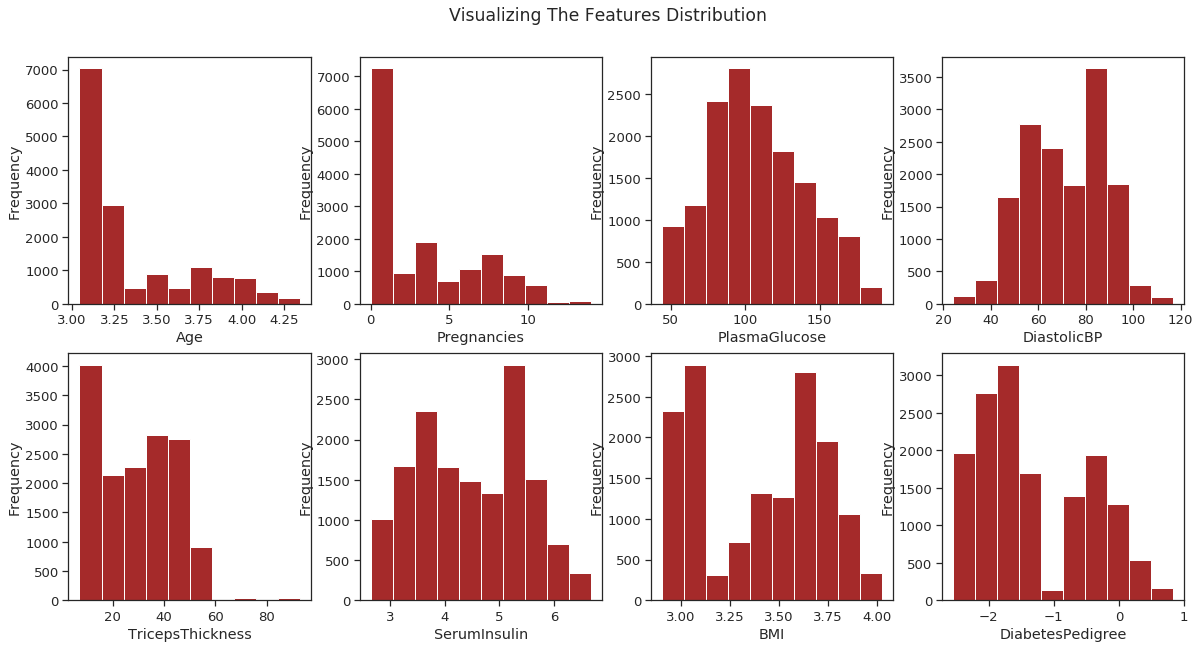

In [8]:
plot_features(diabetes_df)

From the above plots, we can see an improvement to the distribution of our features.<br>
This would help us achieve a better result when we train the model

Okay so now, let's look at the dataset that contains the names of the doctors treating our respective patients.<br>
The raw file is in Github, let's read it to a Dataframe.

In [9]:
doctors_link = 'https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/doctors.csv'

doctors_df = pd.read_csv(doctors_link, encoding='latin-1')
# Note the above code line throws a UnicodeDecodeError except we encode the string in latin-1 as shown above.

doctors_df.head()

,PatientID,Physician
0,1000038,Jeanne Vestergaard
1,1000069,Sheldon Comeaux
2,1000118,Brain Dulaney
3,1000183,Alaine Poisson
4,1000326,Erik Collado


In [10]:
doctors_df.shape

(14895, 2)

In [11]:
doctors_df.isna().sum()

PatientID    0
Physician    0
dtype: int64

So we can see that the Doctor data is slightly smaller than the patients dataset.<br>
This may be due to the fact that a few doctors saw more than one patient.<br>
Let's left-join the diabetes_df and doctors_df data frames using the PatientID as the join key.<br>
Left-join here is important so that we keep data for patients who may not have doctors names too.

In [12]:
diabetes_doctor_df = pd.merge(diabetes_df, doctors_df, how='left', on='PatientID' )

diabetes_doctor_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,3.135494,3.772984,0.193254,3.044522,0,Dan Drayton
1,1147438,8,92,93,47,3.583519,3.055913,-1.842853,3.135494,0,Anthony Frizzell
2,1640031,7,115,47,52,3.555348,3.725971,-2.538072,3.135494,0,Gordon Fredrickson
3,1883350,9,103,78,25,5.717028,3.387173,0.249100,3.761200,1,Chad Corbitt
4,1424119,1,85,59,27,3.555348,3.751961,-0.598670,3.091042,0,Zachary Fellows


Now we can see the doctors column appended and can tell which doctor treated a patient.<br>
Let's view the shape and also check the number and columns with null values

In [13]:
diabetes_doctor_df.shape

(15000, 11)

In [14]:
diabetes_doctor_df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
Physician                 0
dtype: int64

We can see no missing values, reason could very well be that some doctors treated multiple patients.

Let's check the number of unique doctors in the doctor list

In [15]:
diabetes_doctor_df.Physician.nunique()

# We can see that there are 109 doctors who treated these 15000 patients

109

Let's also check the number of unique patients in the dataset

In [16]:
diabetes_doctor_df.PatientID.nunique()

14895

It now makes sense,<br>
There are 14895 unique patients and the doctors records have entries for exactly 14895 patients.<br>
The fact that the patients data set has 15000 entries is simply because some patients had multiple entries.<br>
Since we merged the doctors and patients on the PatientID column, the merger rightly assigns each doctor to the patients they treated, even though we have only 109 unique doctors.

In [17]:
diabetes_doctor_df.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
Physician                 0
dtype: int64

### Preparing The Data

As is often the case with machine learning of any kind, some data preparation is required before you can
use the data to train a model.<br>
We shall normalize the features so that features that have large values do not dominate the training.<br>
Looking at the shapes of the distribution of each feature, those with a roughly normal distribution bell-shape will be normalized using the Zscore method.<br>
While those with varying large and low values will be normalized using the Min-Max method.

**1. Z-Score or Standard Score**_  
_For each value here, we subtract the average or mean..._  
_And then divide by the Standard deviation._  
_This gives a range between minus 3 and 3, but can be more or less_  

$Xnew =$ $Xold - mean \over STD(sigma)$

_**2. Min-Max Method**_  
_This method takes each value and subtracts the min and then divides by the range(max - min)..._  
_The resultant values range between zero(0) and one(1)_

$Xnew =$ $Xold - Xmin \over Xmax - Xmin$

Now let's apply these methods to the selected columns using the apply method.

In [0]:
for i in diabetes_doctor_df.columns[:-2]:
    mean = diabetes_doctor_df[i].mean()
    std = diabetes_doctor_df[i].std()
    mini = diabetes_doctor_df[i].min()
    maxi = diabetes_doctor_df[i].max()
    
    # if columns are not Age or Pregnancies, apply the Z_score norm method
    if i not in ['Age', 'Pregnancies']:
        diabetes_doctor_df[i] = diabetes_doctor_df[i].apply(lambda x: (x - mean) / std)
    
    # Else if columns are either Age or Pregnancies, then apply the Min-Max norm method
    else:
        diabetes_doctor_df[i] = diabetes_doctor_df[i].apply(lambda x: (x - mini) / (maxi - mini))
    

In [19]:
diabetes_doctor_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,-0.512160,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000,0,Dan Drayton
1,-1.228971,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017,0,Anthony Frizzell
2,0.474010,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017,0,Gordon Fredrickson
3,1.315206,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595,1,Chad Corbitt
4,-0.272436,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804,0,Zachary Fellows


Now that we have prepared the data set, we will use it to train and evaluate a classifier machine
learning model. Typically, when training a supervised learning model, in which the training data includes
known label values, we split the data into a training set with which to train the model, and a test set
with which to validate predictions generated by the trained model.

Before we go any furteher, let's check the number of observations each class of Diabetics or Non-Diabetics has<br>

In [20]:
diabetes_doctor_df.Diabetic.value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

Let's visualize this distribution

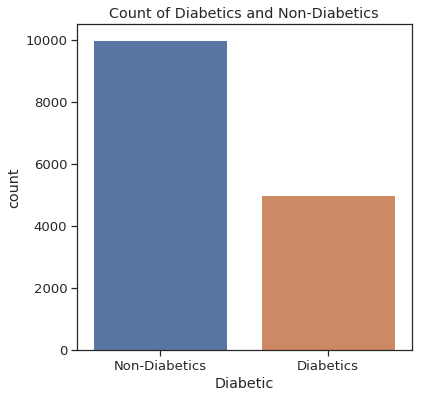

In [21]:
plt.figure(figsize=(6, 6))

x = diabetes_doctor_df.Diabetic.replace(to_replace=[0, 1], value=['Non-Diabetics','Diabetics'])
sns.countplot(x)
plt.title('Count of Diabetics and Non-Diabetics')
plt.show()

We can see that out of the 15,000 observations in our dataset, the Non-Diabetic class has 10,000 entries, while Diabetic class has only 5,000 entries.<br>
This is an imbalanced Dataset and the risk involved is that our Model may learn one class features more than the other.<br>
We need to find a way to balance the Dataset for a more unbiased and reliable classification

To prove the point, let's go ahead to use this imbalanced data set to train a model and make predictions.<br>
Then we would balance the data set and train a new model and see the difference.

Before we do the split, let's select only columns that matter by deselecting PatientID and Physician columns

In [22]:
feature_matrix = diabetes_doctor_df.iloc[:,1:-2]
feature_matrix.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000
1,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017
2,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017
3,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595
4,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804


let's also define our label variable 

In [23]:
label = diabetes_doctor_df.Diabetic

label.head()

0    0
1    0
2    0
3    1
4    0
Name: Diabetic, dtype: int64

In [24]:
feature_matrix.shape

(15000, 8)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, label, test_size=0.3, random_state=1234)

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (10500, 8)
X_test shape is (4500, 8)
y_train shape is (10500,)
y_test shape is (4500,)


Let's build the Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

Let's define a function that plots the Confusion-Matrix

In [0]:
from sklearn.metrics import classification_report


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Lets define a function that plots the ROC Chart

In [0]:
def plot_roc_chart(model):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return probs

Let's define a function that returns the best decison tree classifier model and outputs its parameters and a plot of the confusion matrix

In [0]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters


def best_decision_tree_classifier(X_train, X_test, y_train, y_test):
    max_depth = 100
    accuracy_dict={'max_depth':0, 'val_acc':0, 'f1_Score':0, 'log_loss':0}

    for i in range(1, max_depth+1):
            # Let's instantiate a model
            decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)

            # Let's train the model
            decision_model.fit(X_train, y_train)

            # Let's make prediction on the test data
            y_hat = decision_model.predict(X_test)

            # Let's measure accuracy of predictions on test data
            val_accu = round(metrics.accuracy_score(y_test, y_hat),4)

            # Let's Measure the F1 Score
            val_f1 = round(f1_score(y_test, y_hat, average='weighted'),4)

            # Let's Measure Logloss
            logloss = round(log_loss(y_test, y_hat, normalize=True),4)

            if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
                accuracy_dict['max_depth'] = i
                accuracy_dict['val_acc'] = val_accu
                accuracy_dict['f1_Score'] = val_f1
                accuracy_dict['log_loss'] = logloss
                decision_model = decision_model
                
            # Compute confusion matrix
            Dtrees_cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
            np.set_printoptions(precision=2)
            
            TP = Dtrees_cnf_matrix[0,0]
            FP = Dtrees_cnf_matrix[0,1]
            FN = Dtrees_cnf_matrix[1,0]
            TN = Dtrees_cnf_matrix[1,1]
            
            accuracy = (TP + TN) / (TP + TN + FP + FN)
            recall = TP / (TP + FN)
            precision = TP / (TP + FP)
            
    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for Decision-Tree-Classifier')
    plt.show()
    print()

    print('TP is:',TP,'FP is:',FP,'TN is:',TN,'FN is:',FN)
    print()
    print('Model Evaluation:')
    print(accuracy_dict)
    print()
    plot_roc_chart(decision_model)
    print()
    print('accuracy is:',round(accuracy,2))
    print('recall is:',round(recall,2))
    print('precision is:',round(precision,2))
    print()
    
    return decision_model

Confusion matrix, without normalization
[[1323  219]
 [ 236 2722]]


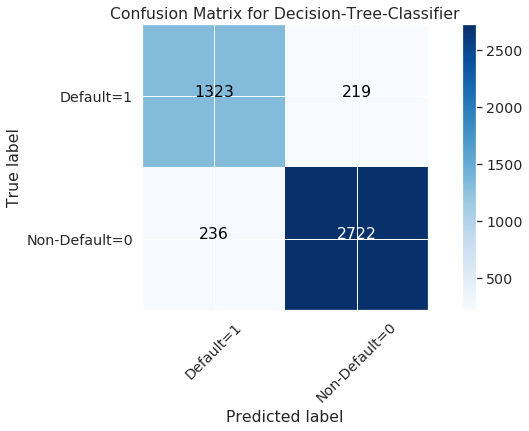


TP is: 1323 FP is: 219 TN is: 2722 FN is: 236

Model Evaluation:
{'max_depth': 8, 'val_acc': 0.9093, 'f1_Score': 0.9097, 'log_loss': 3.1316}



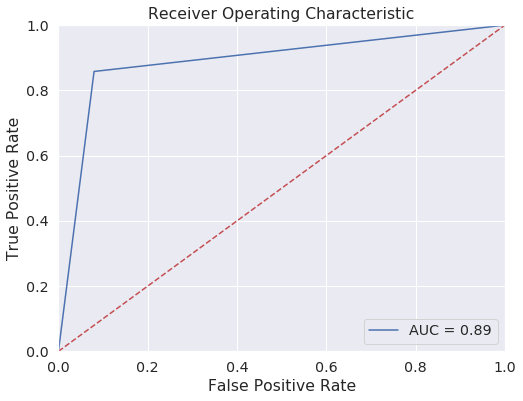


accuracy is: 0.9
recall is: 0.85
precision is: 0.86



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
decision_tree_classifier = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
decision_tree_classifier

##Note

Notice the following about these metrics:<br>
• The Confusion Matrix shows the number of True Positives and True Negatives (cases
correctly classified) and False Negatives and False Positives (cases incorrectly classified).<br>
• The AUC (Area Under the Curve) is the area under the ROC curve. A perfect classifier
would have an AUC of 1.0, indicating no trade-off between True and False Positive Rates.<br>
• Accuracy is the fraction of cases correctly classified.<br>
• Recall, is the fraction of positive cases correctly classified. <br>
• Precision is the fraction of negative cases correctly classified.

### Let's balance the dataset and train a new model

We need to balance The Data set because in an imbalanced Data set Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results (that is, when the numbers of observations in different classes vary greatly).<br>
For example, 70% non-defaulters and 30% defaulters, a particular classifier might classify all or most of the observations as Non-defaulters.<br> 
This is due to the classifier or model having a high recognition rate (sensitivity) for the dominant class.<br>
[F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) too, would even be more unreliable in an imbalanced Data set.
See [link](https://en.wikipedia.org/wiki/Confusion_matrix)

**SMOTE - Synthetic Minority Over-sampling Technique** [link](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
over_sampled_features, over_sampled_label = sm.fit_resample(feature_matrix, label)

In [33]:
print('Shape of resampled feature set is:',over_sampled_features.shape)
print('Shape of resampled target data is:',over_sampled_label.shape)

Shape of resampled feature set is: (20000, 8)
Shape of resampled target data is: (20000,)


Let's concat the features and target back into one data frame

In [34]:
over_sampled_df = pd.DataFrame(over_sampled_features, columns=['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age'])

over_sampled_df['Diabetic'] = over_sampled_label

over_sampled_df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0.000000,1.974335,0.523867,0.356286,-1.364665,1.165284,1.755479,0.000000,0
1,0.571429,-0.495806,1.299582,1.249406,-0.908607,-1.076800,-0.637939,0.070017,0
2,0.500000,0.223349,-1.445258,1.592914,-0.937283,1.018286,-1.455161,0.070017,0
3,0.642857,-0.151863,0.404526,-0.262028,1.263156,-0.041044,1.821124,0.551595,1
4,0.071429,-0.714680,-0.729213,-0.124625,-0.937283,1.099549,0.824581,0.035804,0


In [35]:
over_sampled_df.shape

(20000, 9)

Let's visualize the new distribution 

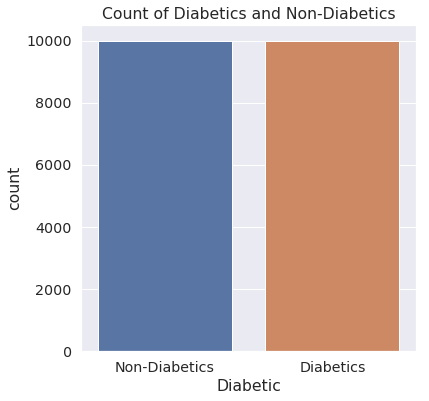

In [36]:
plt.figure(figsize=(6, 6))

x = over_sampled_df.Diabetic.replace(to_replace=[0, 1], value=['Non-Diabetics','Diabetics'])
sns.countplot(x)
plt.title('Count of Diabetics and Non-Diabetics')
plt.show()

Okay so the above is a well balanced dataset. let's go on to train the model by first splitting the dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(over_sampled_df.iloc[:,:-1], over_sampled_df.Diabetic, test_size=0.3, random_state=1234)

print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

X_train shape is (14000, 8)
X_test shape is (6000, 8)
y_train shape is (14000,)
y_test shape is (6000,)


Let's call the DecisionTreeFunction to build and classify and evaluate our model prediction

Confusion matrix, without normalization
[[2773  245]
 [ 229 2753]]


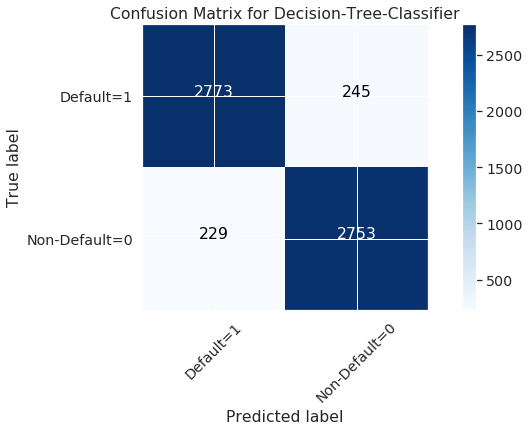


TP is: 2773 FP is: 245 TN is: 2753 FN is: 229

Model Evaluation:
{'max_depth': 10, 'val_acc': 0.9257, 'f1_Score': 0.9257, 'log_loss': 2.5674}



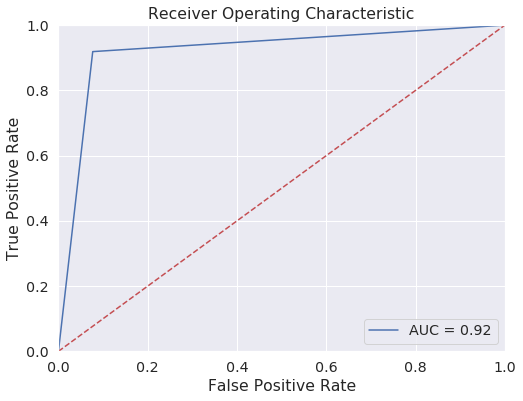


accuracy is: 0.92
recall is: 0.92
precision is: 0.92



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
decision_tree_classifier = best_decision_tree_classifier(X_train, X_test, y_train, y_test)
decision_tree_classifier

We can clearly see a boost in model performance by just balancing the dataset.<br>
The model generalises better and is more accurate and confident in its classification tasks